In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from statsmodels.tools.eval_measures import mse, rmse
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsRegressor

In [4]:
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data-original', header=None, 
            delim_whitespace=True, names=['mpg','cylinders','displacement','horsepower','weight','acceleration','model year','origin','car name']
)

The exploratory data analysis can be found in the OLS notebook.

In [5]:
df.drop(df[df.mpg.isnull()].index,inplace=True)

In [6]:
# looked up the horsepower values online.  Now they may not be correct
df.loc[38,'horsepower'] = 100
df.loc[133,'horsepower'] = 94
df.loc[337,'horsepower'] = 53.5
df.loc[343,'horsepower'] = 88
df.loc[361,'horsepower'] = 81
df.loc[382,'horsepower'] = 82


In [9]:
df.drop('car name', axis=1, inplace=True)

# Scaling the data

In [10]:
X = df.drop('mpg',axis=1)
y =df.mpg

In [12]:
scaler = StandardScaler()
X_scaled = scaler.fit(X.values).transform(X.values)
y_scaled = scale(y.values)

# Visualizing the data

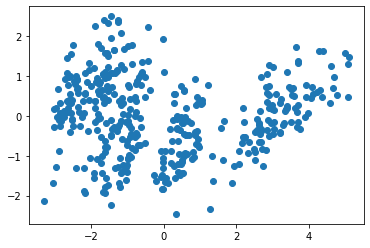

In [21]:
pca = PCA(n_components=2)
x2d = pca.fit_transform(X_scaled)
plt.scatter(x2d[:,0],x2d[:,1])

The plot shows dense areas.  For KNN I will probably not weigh distance

# Creating the model

In [22]:
kn = KNeighborsRegressor(n_neighbors=5)

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size = 0.2,random_state=625)

In [24]:
kn.fit(X_train,y_train)

KNeighborsRegressor()

# Evaluating the model

In [25]:
def mape(y_values, y_preds):
    return np.mean(np.abs(y_values-y_preds)/y_values)

In [26]:
def print_prediction_errors(y_test, y_preds):
    print("The mean absolute error of the model: ",mean_absolute_error(y_test, y_preds))
    print("The mean absolute percentage error of the model: ",mape(y_test, y_preds))
    print("The mean square error of the model: ",mse(y_test,y_preds))
    print("The root mean square error of the model: ",rmse(y_test,y_preds))

In [27]:
y_preds = kn.predict(X_test)

In [28]:
r1 = kn.score(X_train,y_train)
r2 = kn.score(X_test,y_test)
print("R-squared for the training set is: ",r1)
print('-'*50)
print('R-squared for the test set is: ',r2)
print_prediction_errors(y_test,y_preds)
print('-'*50)
print("The difference in R squared between training and test sets is: ", r2-r1)

R-squared for the training set is:  0.890411093212857
--------------------------------------------------
R-squared for the test set is:  0.8898600121835012
The mean absolute error of the model:  0.24080344574648116
The mean absolute percentage error of the model:  -0.10930070414796908
The mean square error of the model:  0.10332828991034657
The root mean square error of the model:  0.32144718059169003
--------------------------------------------------
The difference in R squared between training and test sets is:  -0.0005510810293558599


# Comparing the models

K nearest neighbors performed better than OLS.  Two reasons for this may be that the values were scaled in KNN as well as all variables where included when fitting the model whereas with OLS, because of correlation, some variables needed to be excluded.  I would like to come back to this assignment at a later date and use a validation set to try different variable combinations to use for OLS, as well as try different values of K for k nearest neighbors.  I would also use the validation set to try regularization with OLS.  